In [28]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Loading the dataset
titanic_data=pd.read_csv('titanic_dataset.csv')

In [30]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
titanic_data=titanic_data.set_index('PassengerId')

In [33]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [35]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

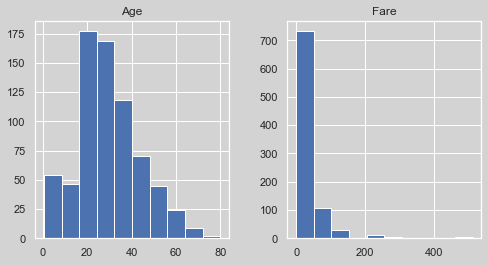

In [36]:
freqgraph=titanic_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,4))
plt.show()

In [37]:
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data['Cabin']=titanic_data['Cabin'].fillna(titanic_data['Cabin'].mode()[0])

In [38]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

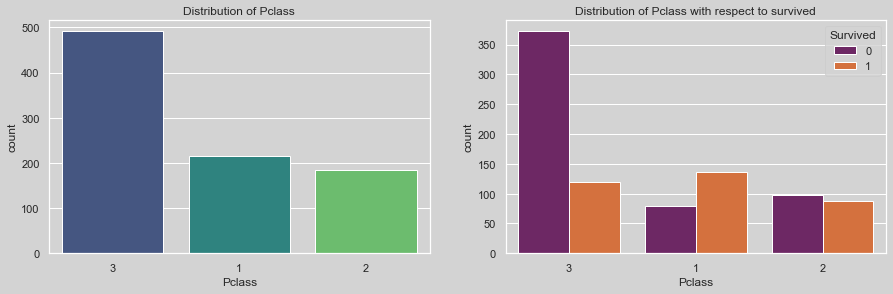

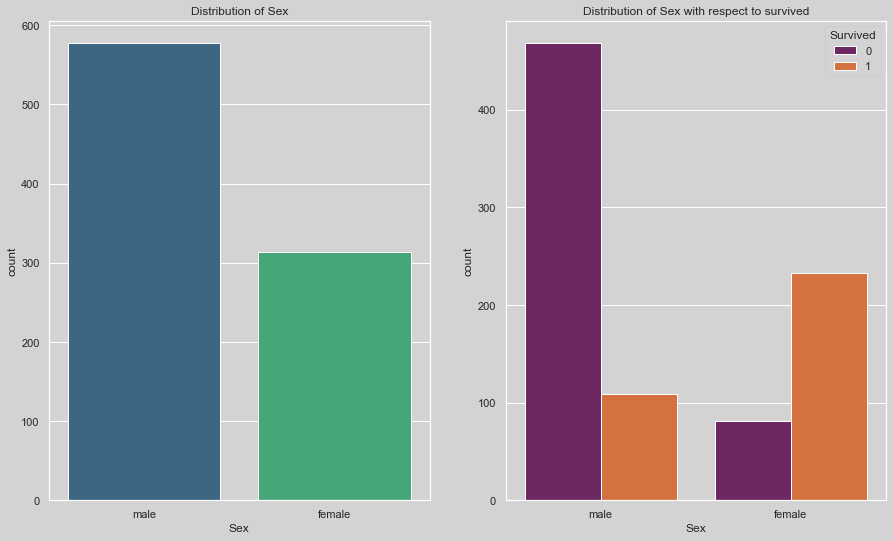

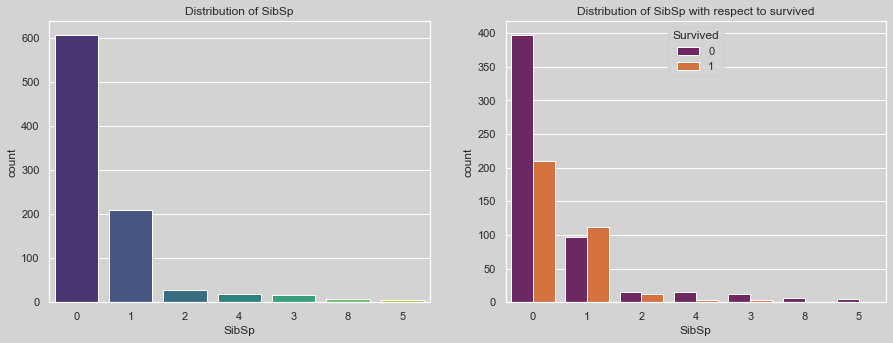

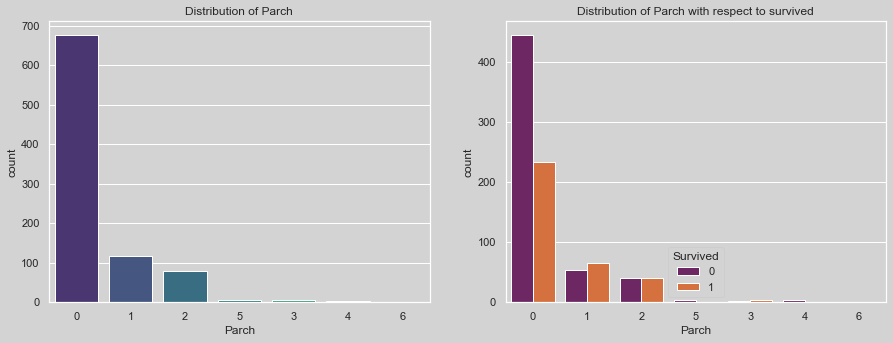

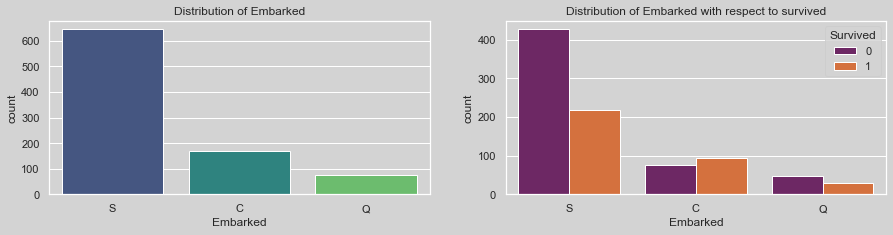

In [39]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

columns =["Pclass","Sex","SibSp","Parch","Embarked" ]

for i in columns:
    plt.figure(figsize=(15,30))
    plt.subplot(len(i), 2, 1)
    sns.countplot(x=titanic_data[i],order=titanic_data[i].value_counts().index,palette="viridis")
    plt.title('Distribution of {}'.format(i))
    
    plt.subplot(len(i), 2, 2)
    sns.countplot(x=titanic_data[i],order=titanic_data[i].value_counts().index,hue=titanic_data["Survived"],palette="inferno")
    plt.title('Distribution of {} with respect to survived'.format(i))
    plt.show() 

[]

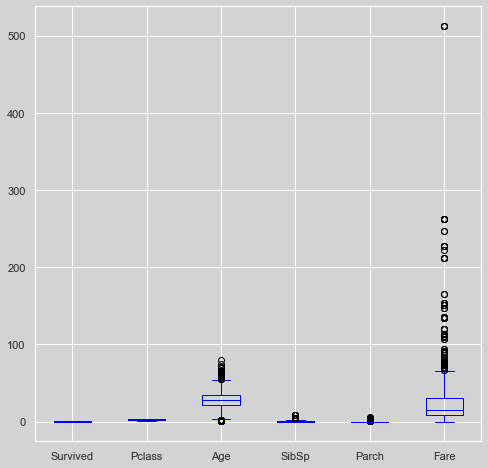

In [40]:
#Checking the outliers using boxplot
plt.figure(figsize=(8,8))
titanic_data.boxplot(return_type='dict',color='blue')
plt.plot()

Q1: 7.9104
Q2: 14.4542
Q3: 31.0
IQR: 23.0896
low_limit: -26.724
upper_limit: 65.6344


{'whiskers': [<matplotlib.lines.Line2D at 0x19511f84760>,
 'caps': [<matplotlib.lines.Line2D at 0x19511f84d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x19511f843d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19511f8d4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19511f8d850>],
 'means': []}

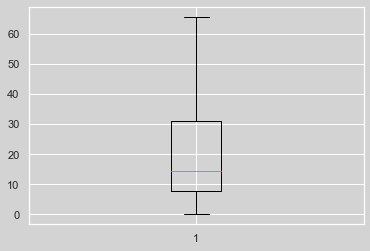

In [41]:
#Handling the outliers
Q1=np.percentile(titanic_data["Fare"],25,interpolation="midpoint")
Q2=np.percentile(titanic_data["Fare"],50,interpolation="midpoint")
Q3=np.percentile(titanic_data["Fare"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)
outlier=[]
for x in titanic_data["Fare"]:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)
titanic_data["Fare"]=np.where(titanic_data["Fare"]>up_limit,up_limit,np.where(titanic_data["Fare"]<low_limit,low_limit,titanic_data["Fare"]))
plt.boxplot(titanic_data["Fare"])

Q1: 0.0
Q2: 0.0
Q3: 1.0
IQR: 1.0
low_limit: -1.5
upper_limit: 2.5


{'whiskers': [<matplotlib.lines.Line2D at 0x19511fe94f0>,
 'caps': [<matplotlib.lines.Line2D at 0x19511fe9c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19511fe9160>],
 'medians': [<matplotlib.lines.Line2D at 0x19511ff3370>],
 'fliers': [<matplotlib.lines.Line2D at 0x19511ff3700>],
 'means': []}

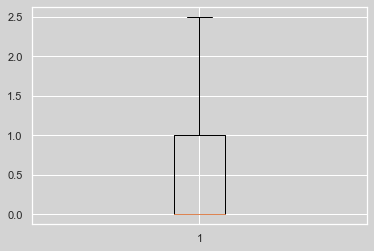

In [42]:
Q1=np.percentile(titanic_data["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(titanic_data["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(titanic_data["SibSp"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)
Outlier=[]
for x in titanic_data["SibSp"]:
    if((x<low_limit) or (x>up_limit)):
        Outlier.append(x)
titanic_data["SibSp"]=np.where(titanic_data["SibSp"]>up_limit,up_limit,np.where(titanic_data["SibSp"]<low_limit,low_limit,titanic_data["SibSp"]))
plt.boxplot(titanic_data["SibSp"])

Q1: 22.0
Q2: 28.0
Q3: 35.0
IQR: 13.0
low_limit: 2.5
upper_limit: 54.5


{'whiskers': [<matplotlib.lines.Line2D at 0x195122e4d60>,
 'caps': [<matplotlib.lines.Line2D at 0x195122f04c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x195122e49d0>],
 'medians': [<matplotlib.lines.Line2D at 0x195122f0be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x195122f0f70>],
 'means': []}

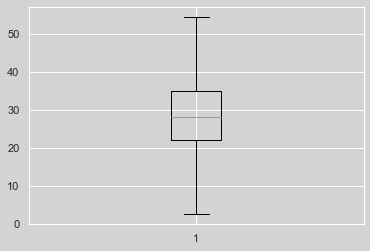

In [43]:
Q1=np.percentile(titanic_data["Age"],25,interpolation="midpoint")
Q2=np.percentile(titanic_data["Age"],50,interpolation="midpoint")
Q3=np.percentile(titanic_data["Age"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)
Outlier=[]
for x in titanic_data["SibSp"]:
    if((x<low_limit) or (x>up_limit)):
        Outlier.append(x)
titanic_data["Age"]=np.where(titanic_data["Age"]>up_limit,up_limit,np.where(titanic_data["Age"]<low_limit,low_limit,titanic_data["Age"]))
plt.boxplot(titanic_data["Age"])

<AxesSubplot:>

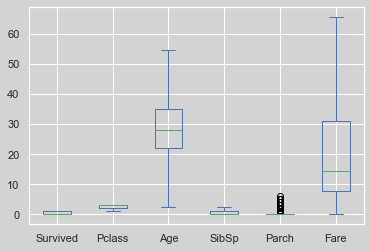

In [44]:
titanic_data.plot(kind='box', vert=True)

In [45]:
titanic_data["Family"]=titanic_data["SibSp"]+titanic_data["Parch"]
titanic_data=titanic_data.drop(["Parch","SibSp","Name","Ticket","Cabin"],axis=1)

In [46]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
titanic_data['Sex'] = ln.fit_transform(titanic_data['Sex'])

In [47]:
titanic_data=pd.get_dummies(titanic_data)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,22.0,7.2500,1.0,0,0,1
2,1,1,0,38.0,65.6344,1.0,1,0,0
3,1,3,0,26.0,7.9250,0.0,0,0,1
4,1,1,0,35.0,53.1000,1.0,0,0,1
5,0,3,1,35.0,8.0500,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,13.0000,0.0,0,0,1
888,1,1,0,19.0,30.0000,0.0,0,0,1
889,0,3,0,28.0,23.4500,3.0,0,0,1


In [48]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
scaled_data=standardscaler.fit_transform(titanic_data)
scaled_data=pd.DataFrame(scaled_data)

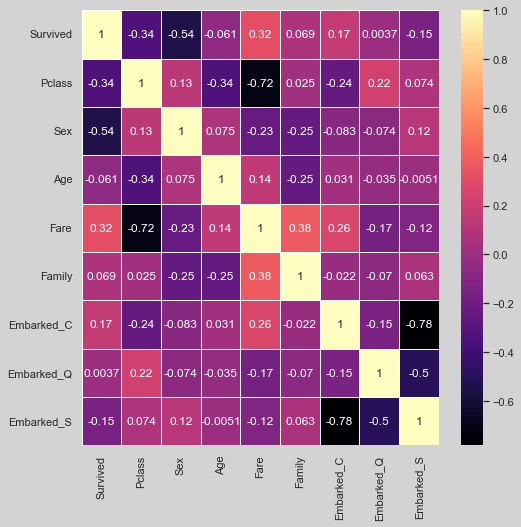

In [49]:
# Correlation 
corr=titanic_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,linewidths=0.5, cmap="magma")
plt.show()

In [50]:
y=titanic_data['Survived']
x=titanic_data.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# NAIVE BAYES CLASSIFIER

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
GNB=GaussianNB()
model=GNB.fit(x_train,y_train)
predict=model.predict(x_test)
print('The accuracy of the NaiveBayes is',accuracy_score(predict,y_test))
print("Confusion Matrix \n" ,confusion_matrix(predict,y_test))

The accuracy of the NaiveBayes is 0.776536312849162
Confusion Matrix 
 [[80 15]
 [25 59]]


In [52]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
mm=classifier.fit(x_train,y_train)
pred=mm.predict(x_test)
print('The accuracy of the NaiveBayes is',accuracy_score(pred,y_test))
print("Confusion Matrix \n" ,confusion_matrix(pred,y_test))

The accuracy of the NaiveBayes is 0.7821229050279329
Confusion Matrix 
 [[84 18]
 [21 56]]


# HYPERPARAMETER TUNING

In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
params_NB ={'var_smoothing':np.logspace(0,-9,num=100)}
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
gs_NB =GridSearchCV(estimator=model,param_grid=params_NB,cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed =PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [54]:
results_NB =pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score']=gs_NB.cv_results_['mean_test_score']
# predict the target on the test dataset
predict_test =gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test =accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ',accuracy_test)

accuracy_score on test dataset :  0.7653631284916201
